# Eksamen i Fys1120 H2023 - Oppgave 1
*Du kan totalt få 100 poeng i denne oppgaven. Maksimal poengsum er oppgitt for hver deloppgave.*

Vi skal i denne oppgaven studere det elektriske feltet rundt en dipol som består av to ringformede ladninger.
Vi skal først studere en enkelt ringladning og deretter se på to ringladninger med motsatt ladning.

## Potensial og felt fra en ringladning
Vi ser på en enkelt ringladning med ladning $Q$ som ligger i $xy$-planet. Ringladningen består av en tynn ring med uniform linjeladningstetthet. Den har sentrum i origo og radius $a$. Du kan anta at ringladningen ligger i vakuum.

### Oppgave (a) (10 poeng)
Vis at det elektriske potensialet langs $z$-aksen er gitt som

$$V(z) = \frac{Q}{4 \pi \epsilon_0} \frac{1}{\sqrt{z^2 + a^2}}$$

*(Svar ved å trykke på cellen under og skriv svaret her. Du kan godt bruke mer enn en celle til å skrive svaret ditt.)*

(__Tips__ Du kan trykke på oppgave-cellene også og kopiere LaTeX koden derfra hvis du trenger den)

__Løsning:__ Vi bruker i denne oppgaven uttrykket for det elektriske potensialet fra en kontinuerlig linjeladningsfordeling med linjeladningstetthet $\rho_l$:

$$V(\vec{r}) = \int \frac{\rho_l dl }{4 \pi \epsilon_0 R}$$

hvor $R$ er avstanden fra observasjonspunktet $\vec{r}$ til linjestykket $dl$. I dette tilfellet er denne avstanden $R^2 = a^2 + z^2$ for alle punkter på linjeladningen. Vi får derfor at $R$ er en konstant i integrasjonen og kan settes utenfor integrasjonen:

$$V(z) = \frac{1}{4 \pi \epsilon_0 R} \int \rho_l d l$$

Hvor integralet blir ladningen til ringen, $Q$. Når vi setter inn $R = \sqrt{z^2 + a^2}$ blir svaret

$$V(z) = \frac{Q}{4 \pi \epsilon_0 \sqrt{z^2 + a^2}}$$


### Oppgave (b) (10 poeng)
Finn $z$-komponenten av det elektriske feltet langs $z$-aksen, $E_z(z)$.

__Løsning:__ Vi finner det elektriske feltet langs $z$-aksen ved

$$E_z = - \frac{\partial V}{\partial z}$$

Vi setter inn og finner at

$$E_z = - \frac{\partial }{\partial z} \left( \frac{Q}{4 \pi \epsilon_0} (z^2 + a^2)^{-1/2} \right) = -\frac{Q}{4 \pi \epsilon_0} \left(-\frac{1}{2}\right)2z (z^2 + a^2)^{-3/2}  =
\frac{Q}{4 \pi \epsilon_0} \frac{z}{(z^2 + a^2)^{3/2}} 
$$

### Eksempel
Som en hjelp til å løse oppgaven, kan du ta utgangspunkt i dette eksempelet. Merk at dette eksempelet løser et annet problem enn det du skal løse i denne oppgaven, men du kan bruke deler av koden fra dette eksempelet til å løse oppgavene nedenfor hvis du ønsker det.

Det elektriske potensialet fra en linje med ladning $q = 1\text{mC}$ langs $x$-aksen fra $x=-a$ til $x=a$ kan beregnes og visualiseres ved hjelp av følgende program:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def epotlist(r,Q,R):
    epsilon0 = 8.854e-12
    K = 1.0/(4.0*np.pi*epsilon0)
    V = 0.0
    for i in range(len(R)):
        Ri = r - R[i]
        qi = Q[i]
        Rinorm = np.linalg.norm(Ri)
        V = V + qi/Rinorm
    V = V*K
    return V
def findpotential(R,Q,y0,y1,z0,z1,Ny,Nz):
    y = np.linspace(y0,y1,Ny)
    z = np.linspace(z0,z1,Nz)
    ry,rz = np.meshgrid(y,z)
    V = np.zeros((Ny,Nz),float)
    for i in range(len(ry.flat)):
        r = np.array([0.0,ry.flat[i],rz.flat[i]])
        V.flat[i] = epotlist(r,Q,R)
    return y,z,ry,rz,V

In [2]:
Q = []
R = []
a = 1.0
q = 1.0e-3
nline = 100
for i in range(nline):
    x = -a + i/nline*(2*a)
    y = 0
    z = 0
    dq = q/nline
    R.append(np.array([x,y,z]))
    Q.append(dq)

In [3]:
y,z,ry,rz,V = findpotential(R,Q,-2*a,2*a,-2*a,2*a,30,30)

(-2.0, 2.0, -2.0, 2.0)

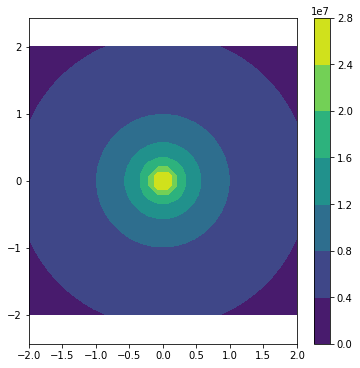

In [4]:
plt.figure(figsize=(6,6))
plt.contourf(ry,rz,V)
plt.colorbar()
plt.axis('equal')

### Oppgave (c) (15 poeng)
Skriv et program som finner det elektriske potensialet fra ringladningen i $yz$-planet og visualiserer dette i et passende område slik at potensialets form klart kommer frem.

Vi velger den samme ladningen som tidligere, dvs $q = 1 \text{mC}$. Vi kan enten velge en radius $a = 1 \text{m}$ eller vi kan uttrykke alle størrelser i enheter av $a$. Vi velger $a = 1 \text{m}$ og oppgir størrelsene med disse enhetene.

(-2.0, 2.0, -2.0, 2.0)

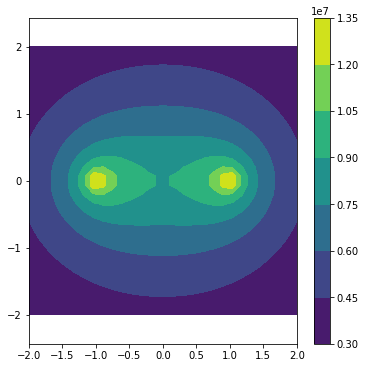

In [5]:
# Løsning

import numpy as np
import matplotlib.pyplot as plt
def epotlist(r,Q,R):
    epsilon0 = 8.854e-12
    K = 1.0/(4.0*np.pi*epsilon0)
    V = 0.0
    for i in range(len(R)):
        Ri = r - R[i]
        qi = Q[i]
        Rinorm = np.linalg.norm(Ri)
        V = V + qi/Rinorm
    V = V*K
    return V
def findpotential(R,Q,y0,y1,z0,z1,Ny,Nz):
    y = np.linspace(y0,y1,Ny)
    z = np.linspace(z0,z1,Nz)
    ry,rz = np.meshgrid(y,z)
    V = np.zeros((Ny,Nz),float)
    for i in range(len(ry.flat)):
        r = np.array([0.0,ry.flat[i],rz.flat[i]])
        V.flat[i] = epotlist(r,Q,R)
    return y,z,ry,rz,V

Q = []
R = []
a = 1.0
q = 1.0e-3
nline = 100
for i in range(nline):
    theta = 2*np.pi/nline*i
    x = a*np.cos(theta)
    y = a*np.sin(theta)
    z = 0
    dq = q/nline
    R.append(np.array([x,y,z]))
    Q.append(dq)
    
y,z,ry,rz,V = findpotential(R,Q,-2*a,2*a,-2*a,2*a,30,30)

plt.figure(figsize=(6,6))
plt.contourf(ry,rz,V)
plt.colorbar()
plt.axis('equal')

### Oppgave (d) (15 poeng)

Kontroller resultatet fra programmet ditt ved å sammenlikne med den eksakte løsningen du fant i oppgave (a). Vis ved et plot at beregningen fra programmet sammenfaller med det teoretiske resultatet langs $z$-aksen.


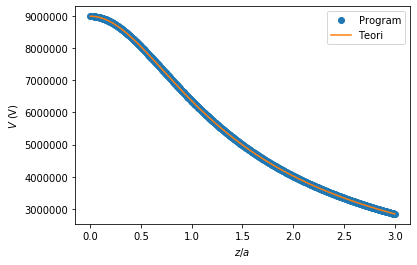

In [6]:
# Løsning

# Vi beregner potensialet langs z-aksen med programmet
# og kaller disse resultatne z_mod,V_mod
z_mod = np.linspace(0,3*a,1000)
V_mod = np.zeros(z_mod.shape)
for i in range(len(z_mod)):
    r = np.array([0,0,z_mod[i]])
    V_mod[i] = epotlist(r,Q,R)
# Vi beregner potensialet langs z-aksen med det teoretiske resultatet
epsilon0 = 8.854e-12
V_teori = q/(4*np.pi*epsilon0*np.sqrt(z_mod**2+a**2))
plt.plot(z_mod,V_mod,'o',label='Program')
plt.plot(z_mod,V_teori,'-',label='Teori')
plt.xlabel('$z/a$')
plt.ylabel('$V$ (V)')
plt.legend()

Vi ser at verdiene fra den numeriske metoden sammenfaller perfekt med det eksakte teoretiske resultatet. I dette tilfellet er dette ikke overraskende fordi svaret fra den numeriske metoden langs $z$-aksen blir det samme uavhengig av hvilken oppløsning man har valgt på ringen.

Merk at man her kan plotte $V(z)$ bare for positive $z$ eller for både positive og negative $z$ --- begge alternativer er like riktige.

## Dipol av to ringladninger
Vi skal nå studere et dipol-aktig system som består av to ringladninger: 
- En ringladning med ladning $Q = 1\text{mC}$ og radius $a$ med sentrum i $(0,0,a)$ som ligger i et plan parallellt med $xy$-planet.
- En ringladning med ladning $Q = -1\text{mC}$ og radius $a$ med sentrum i $(0,0,-a)$ som ligger i et plan parallellt med $xy$-planet.


### Oppgave (e) (15 poeng)
Skriv et program som finner det elektriske potensialet i $yz$-planet for dette systemet og visualiserer det i et passende område så potensialets form klart kommer frem.

Text(0, 0.5, '$z/a$')

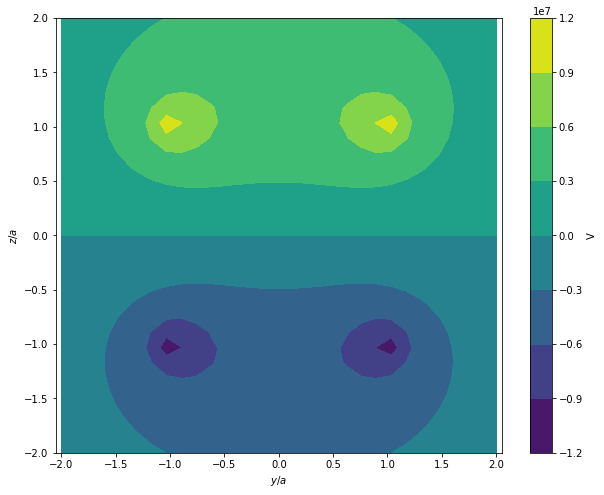

In [7]:
# Løsning

import numpy as np
import matplotlib.pyplot as plt
def epotlist(r,Q,R):
    epsilon0 = 8.854e-12
    K = 1.0/(4.0*np.pi*epsilon0)
    V = 0.0
    for i in range(len(R)):
        Ri = r - R[i]
        qi = Q[i]
        Rinorm = np.linalg.norm(Ri)
        V = V + qi/Rinorm
    V = V*K
    return V
def findpotential(R,Q,y0,y1,z0,z1,Ny,Nz):
    y = np.linspace(y0,y1,Ny)
    z = np.linspace(z0,z1,Nz)
    ry,rz = np.meshgrid(y,z)
    V = np.zeros((Ny,Nz),float)
    for i in range(len(ry.flat)):
        r = np.array([0.0,ry.flat[i],rz.flat[i]])
        V.flat[i] = epotlist(r,Q,R)
    return y,z,ry,rz,V

Q = []
R = []
a = 1.0
q = 1.0e-3

# Positivt ladet ring
nline = 100
for i in range(nline):
    theta = 2*np.pi/nline*i
    x = a*np.cos(theta)
    y = a*np.sin(theta)
    z = a
    dq = q/nline
    R.append(np.array([x,y,z]))
    Q.append(dq)

# Negativt ladet ring
nline = 100
for i in range(nline):
    theta = 2*np.pi/nline*i
    x = a*np.cos(theta)
    y = a*np.sin(theta)
    z = -a
    dq = -q/nline
    R.append(np.array([x,y,z]))
    Q.append(dq)

y,z,ry,rz,V = findpotential(R,Q,-2*a,2*a,-2*a,2*a,30,30)

plt.figure(figsize=(10,8))
plt.contourf(ry,rz,V)
plt.colorbar(label='V')
plt.axis('equal')
plt.xlabel('$y/a$')
plt.ylabel('$z/a$')

### Oppgave (f) (15 poeng)
Det elektriske potensialet $V(\vec{r})$ i et punkt $\vec{r}$ fra en dipol med dipolmoment $\vec{p} = q \vec{d}$ med sentrum i origo er tilnærmet lik:

$$V(\vec{r}) = \frac{1}{4 \pi \epsilon_0}\frac{\vec{p}\cdot \hat{r}}{r^2}$$

hvor $\hat{r} = \vec{r}/r$, $r = |\vec{r}|$ og $\vec{d}$ er en vektor fra den negative ladningen $-q$ til den positive ladningen $q$.

Sammenlikn det elektriske potensialet fra programmet med det tilnærmede uttrykket for en dipol langs en linje som er parallell med $z$-aksen og går gjennom $(2a,0,0)$ ved å plotte de to uttrykkene i samme plot.

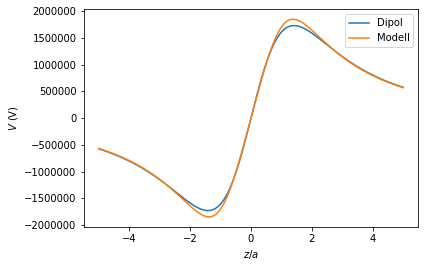

In [8]:
# Løsning

# Dipolmoment
q = 1.0e-3
p = np.array([0,0,2*a*q])
z_dipol = np.linspace(-5*a,5*a,1000)
V_dipol = np.zeros(z_dipol.shape)
V_model = np.zeros(z_dipol.shape)
for i in range(len(z_dipol)):
    ri = np.array([2*a,0,z_dipol[i]])
    V_dipol[i] = 1/(4*np.pi*epsilon0)*np.dot(p,ri)/np.linalg.norm(ri)**3
    V_model[i] = epotlist(ri,Q,R)
plt.plot(z_dipol,V_dipol,'-',label='Dipol')
plt.plot(z_dipol,V_model,'-',label='Modell')
plt.xlabel('$z/a$')
plt.ylabel('$V$ (V)')
plt.legend()

Vi ser at den numeriske løsningen og det tilnærmede uttrykket sammenfaller godt, men at avviket er størst nærmeste ringene som er som forventet, da det tilnærmede uttrykket ikke inkluderer effekten av ringene.

(Merk: Hvis du her har lagt dipolen langs linjen gjennom $(2a,0,0)$ er det også en mulig tolkning av oppgaven og du vil få full uttelling hvis dette er korrekt gjort).

### Oppgave (g) (10 poeng)
Visualiser det elektriske feltet fra de to ringladningene i $yz$-planet. 

Text(0, 0.5, '$z/a$')

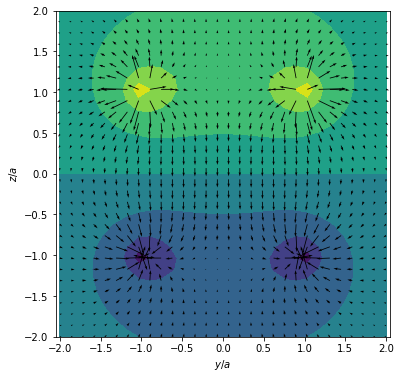

In [9]:
# Løsning

Ez,Ey = np.gradient(-V)

plt.figure(figsize=(6,6))
plt.contourf(ry,rz,V)
plt.quiver(ry,rz,Ey,Ez)
plt.axis('equal')
plt.xlabel('$y/a$')
plt.ylabel('$z/a$')

### Oppgave (h) (10 poeng)

Bruk modellen til å finne $E_z(x,0,0)$ for systemet som består av de to ringladningene.

*(Hint: Finn det elektriske potensialet umiddelbart over og under $xy$-planet langs en linje langs $x$-aksen og bruk dette til å finne $E_z$)*

Text(0, 0.5, '$E_z$ (V/m)')

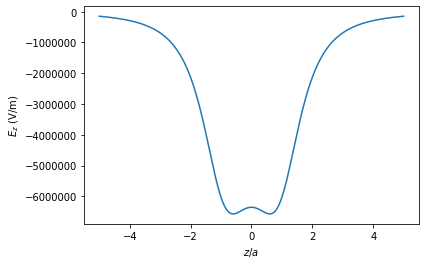

In [10]:
# Løsning

xm = np.linspace(-5*a,5*a,1000)
Ez = np.zeros(xm.shape)
dz = 0.01*a
for i in range(len(xm)):
    # Finner potensialet umiddelbart over og under xy-planet
    r1 = np.array([xm[i],0,dz])
    V1 = epotlist(r1,Q,R)
    r2 = np.array([xm[i],0,-dz])
    V2 = epotlist(r2,Q,R)
    Ez[i] = -(V1-V2)/(2*dz)
plt.plot(xm,Ez)
plt.xlabel('$z/a$')
plt.ylabel('$E_z$ (V/m)')